In [19]:
import pandas as pd
import numpy as np

In [48]:
import pandas as pd
import numpy as np
import random
import os
from sklearn.preprocessing import MinMaxScaler

## Read training data (Will be splited to tr/test data for local validation & parameters tuning)

print('**************************** READING THE DATA ******************************************')


df_40_M = pd.read_csv('/opt/recsys20_challenge/dataset/Training_1_M_Data.tsv', sep='\x01', encoding='utf-8', header=None,
                      names=["text_ tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains",\
                "tweet_type","language", "tweet_timestamp", "engaged_with_user_id", "engaged_with_user_follower_count",\
               "engaged_with_user_following_count", "engaged_with_user_is_verified", "engaged_with_user_account_creation",\
               "engaging_user_id", "engaging_user_follower_count", "engaging_user_following_count", "engaging_user_is_verified",\
               "engaging_user_account_creation", "engagee_follows_engager", "reply_timestamp", "retweet_timestamp", 
                      "retweet_with_comment_timestamp", "like_timestamp"], usecols = ['engaging_user_id', 'tweet_id', 'present_domains', 'tweet_type', 'language',
       'present_media', 'engagee_follows_engager', 'hashtags',
       'engaging_user_follower_count', 'engaging_user_following_count',
       'engaged_with_user_follower_count', 'engaged_with_user_following_count', 
       'engaged_with_user_is_verified', 'engaging_user_is_verified',
       'engaging_user_account_creation', 'engaged_with_user_account_creation',
       'reply_timestamp', 'retweet_timestamp', 'retweet_with_comment_timestamp',
       'like_timestamp'])

print('**************************** ADDING (user,tweet_int) columns ******************************************')
## Add two columns users_int, items_int
df_users_id = df_40_M.engaging_user_id.value_counts()
dict_users_nb_int = dict(zip(list(df_users_id.index), list(df_users_id)))
### For users
list_nb_int_users = list()
mtx = df_40_M['engaging_user_id'].values
for i in range(len(df_40_M)):
    list_nb_int_users.append(dict_users_nb_int[mtx[i]])
df_40_M['users_int'] = list_nb_int_users
### For Tweets
df_tweets_id = df_40_M.tweet_id.value_counts()
dict_tweets_nb_int = dict(zip(list(df_tweets_id.index), list(df_tweets_id)))
###
list_nb_int_tweets = list()
mtx = df_40_M['tweet_id'].values
for i in range(len(df_40_M)):
    list_nb_int_tweets.append(dict_tweets_nb_int[mtx[i]])
df_40_M['tweets_int'] = list_nb_int_tweets

def boolean_replacement(df, column, new_column):
    df[column].fillna('NAN', inplace=True)
    ## Create the target column
    ## Fill timestamp column
    mtx_df = df[column].values
    list_labels=[]
    for i in range(len(mtx_df)):
        if not(mtx_df[i] == 'NAN'):
            list_labels.append(1)
        else:
            list_labels.append(0)
    df[new_column]=list_labels
    ##
    df.drop(column, axis=1, inplace=True)
    return df
##
def nb_eng(engagement='likes', column='Y', df=df_40_M):
    df_Y_1 = df[df[column]==1].engaging_user_id.value_counts() -1 
    dict_nb_likes = dict(zip(list(df_Y_1.index), list(df_Y_1)))
    ### For users
    list_nb_likes = list()
    mtx = df['engaging_user_id'].values
    for i in range(len(df)):
        if mtx[i] in dict_nb_likes:
            list_nb_likes.append(dict_nb_likes[mtx[i]])
        else:
            list_nb_likes.append(0)
    df['nb_' + engagement] = list_nb_likes
    return df    
print('**************** Boolean Replacement *******************')
df_40_M = boolean_replacement(df_40_M, 'like_timestamp', 'Y')
df_40_M = boolean_replacement(df_40_M, 'reply_timestamp', 'reply_Y')
df_40_M = boolean_replacement(df_40_M, 'retweet_timestamp', 'retweet_Y')
df_40_M = boolean_replacement(df_40_M, 'retweet_with_comment_timestamp', 'retweet_C_Y')
##########
print('**************** Interactions per Engagement *******************')
df_40_M = nb_eng('likes', 'Y')
df_40_M = nb_eng('reply', 'reply_Y')
df_40_M = nb_eng('retweet', 'retweet_Y')
df_40_M = nb_eng('retweet_C', 'retweet_C_Y')

**************************** READING THE DATA ******************************************
**************************** ADDING (user,tweet_int) columns ******************************************
**************** Boolean Replacement *******************
**************** Interactions per Engagement *******************


In [44]:
def nb_eng(engagement='likes', column='Y', df=df_40_M)
    df_Y_1 = df[df[column]==1].engaging_user_id.value_counts() -1 
    dict_nb_likes = dict(zip(list(df_Y_1.index), list(df_Y_1)))
    ### For users
    list_nb_likes = list()
    mtx = df['engaging_user_id'].values
    for i in range(len(df)):
        if mtx[i] in dict_nb_likes:
            list_nb_likes.append(dict_nb_likes[mtx[i]])
        else:
            list_nb_likes.append(0)
    df['nb_' + engagement] = list_nb_likes
    return df

In [41]:
df_grouped

5737A0E5871CD52FA8C500EDDA6671F5    8
57C230E2640FAA0748D9F8B1B4EBB143    6
28CE5F8E4FFD9AF7DACC50DF745D3B5B    6
7131FFEFD964C05B561B593AD4FA3CDA    5
E3ACF6CF894AEC507B111E922156CBD4    5
                                   ..
D98B9295327C25D27CF949D44B1EB497    0
04D74973289F771542C72BBA02D9B5A5    0
667978C04E6D9F3D2993260C1742A27C    0
809EE346EAEE42004AEC9DB45B6760C1    0
2B59787EA29FF7EA5E113A33CFCF83BC    0
Name: engaging_user_id, Length: 421125, dtype: int64

In [37]:
df_grouped.values

15189

In [7]:
df_40_M.language.value_counts()[0:10]*100/len(df_40_M)

D3164C7FBCF2565DDF915B1B3AEFB1DC    42.6112
22C448FF81263D4BAF2A176145EE9EAD    15.9467
06D61DCBBE938971E1EA0C38BD9B5446     9.2615
ECED8A16BE2A5E8871FD55F4842F16B1     6.4244
B9175601E87101A984A50F8A62A1C374     5.2278
4DC22C3F31C5C43721E6B5815A595ED6     3.1350
167115458A0DBDFF7E9C0C53A83BAC9B     3.0360
022EC308651FACB02794A8147AEE1B78     2.2310
FA3F382BC409C271E3D6EAF8BE4648DD     2.2202
125C57F4FA6D4E110983FB11B52EFD4E     2.1088
Name: language, dtype: float64

In [34]:
len(df_40_M.tweet_id.value_counts())

891825

In [18]:
df_40_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
engaging_user_id                     1000 non-null object
tweet_id                             1000 non-null object
present_domains                      166 non-null object
tweet_type                           1000 non-null object
language                             1000 non-null object
present_media                        370 non-null object
engagee_follows_engager              1000 non-null bool
hashtags                             203 non-null object
engaging_user_follower_count         1000 non-null int64
engaging_user_following_count        1000 non-null int64
engaged_with_user_follower_count     1000 non-null int64
engaged_with_user_following_count    1000 non-null int64
engaged_with_user_is_verified        1000 non-null int32
dtypes: bool(1), int32(1), int64(4), object(7)
memory usage: 90.9+ KB


In [21]:
df_40_M = pd.read_csv('/opt/recsys20_challenge/dataset/Training_1_K_Data.tsv', sep='\x01', encoding='utf-8', header=None,
                      names=["text_ tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains",\
                "tweet_type","language", "tweet_timestamp", "engaged_with_user_id", "engaged_with_user_follower_count",\
               "engaged_with_user_following_count", "engaged_with_user_is_verified", "engaged_with_user_account_creation",\
               "engaging_user_id", "engaging_user_follower_count", "engaging_user_following_count", "engaging_user_is_verified",\
               "engaging_user_account_creation", "engagee_follows_engager", "reply_timestamp", "retweet_timestamp", 
                      "retweet_with_comment_timestamp", "like_timestamp"], usecols = ['engaging_user_id', 'tweet_id', 'present_domains', 'tweet_type', 'language',
       'present_media', 'engagee_follows_engager', 'hashtags',
       'engaging_user_follower_count', 'engaging_user_following_count',
       'engaged_with_user_follower_count', 'engaged_with_user_following_count', 'engaged_with_user_is_verified'])

In [31]:
from sklearn.preprocessing import MinMaxScaler


In [32]:
## Read training data (Will be splited to tr/test data for local validation & parameters tuning)

print('**************************** READING THE DATA ******************************************')


df_40_M = pd.read_csv('/opt/recsys20_challenge/dataset/Training_1_K_Data.tsv', sep='\x01', encoding='utf-8', header=None,
                      names=["text_ tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains",\
                "tweet_type","language", "tweet_timestamp", "engaged_with_user_id", "engaged_with_user_follower_count",\
               "engaged_with_user_following_count", "engaged_with_user_is_verified", "engaged_with_user_account_creation",\
               "engaging_user_id", "engaging_user_follower_count", "engaging_user_following_count", "engaging_user_is_verified",\
               "engaging_user_account_creation", "engagee_follows_engager", "reply_timestamp", "retweet_timestamp", 
                      "retweet_with_comment_timestamp", "like_timestamp"], usecols = ['engaging_user_id', 'tweet_id', 'present_domains', 'tweet_type', 'language',
       'present_media', 'engagee_follows_engager', 'hashtags',
       'engaging_user_follower_count', 'engaging_user_following_count',
       'engaged_with_user_follower_count', 'engaged_with_user_following_count', 'engaged_with_user_is_verified', 'like_timestamp'])

print('**************************** ADDING (user,tweet_int) columns ******************************************')
## Add two columns users_int, items_int
df_users_id = df_40_M.engaging_user_id.value_counts()
dict_users_nb_int = dict(zip(list(df_users_id.index), list(df_users_id)))
### For users
list_nb_int_users = list()
mtx = df_40_M['engaging_user_id'].values
for i in range(len(df_40_M)):
    list_nb_int_users.append(dict_users_nb_int[mtx[i]])
df_40_M['users_int'] = list_nb_int_users
### For Tweets
df_tweets_id = df_40_M.tweet_id.value_counts()
dict_tweets_nb_int = dict(zip(list(df_tweets_id.index), list(df_tweets_id)))
###
list_nb_int_tweets = list()
mtx = df_40_M['tweet_id'].values
for i in range(len(df_40_M)):
    list_nb_int_tweets.append(dict_tweets_nb_int[mtx[i]])
df_40_M['tweets_int'] = list_nb_int_tweets
##
df_40_M.like_timestamp.fillna('NAN', inplace=True)
## Create the target column
## Fill timestamp column
mtx_df = df_40_M['like_timestamp'].values
list_labels=[]
for i in range(len(mtx_df)):
    if not(mtx_df[i] == 'NAN'):
        list_labels.append(1)
    else:
        list_labels.append(0)
df_40_M['Y']=list_labels
##
df_40_M.drop('like_timestamp', axis=1, inplace=True)
##
print('NB Y=1: ', np.sum(df_40_M['Y'].values))
print('Len DF: ', len(df_40_M))
##
print('Fill Null Values?')
##
df_40_M.fillna('NAN', inplace=True)
print('Change Type?')
### change types of some columns
df_40_M = df_40_M.astype({'engaged_with_user_is_verified': 'int32', 'engagee_follows_engager': 'int32'})
#### 
print('train/test split?')
# Split training/test data
test_len = int(0.1*len(df_40_M))
df_test = df_40_M.iloc[0:test_len,:]
print('test OK')
df_train = df_40_M.iloc[test_len:len(df_40_M),:]
print('train OK')
del df_40_M

print(df_train.columns)
def calc_smooth_mean(df_train, df_test, by, on, m):
    # Compute the global mean
    mean = df_train[on].mean()

    # Compute the number of values and the mean of each group
    agg = df_train.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df_train[by].map(smooth), df_test[by].map(smooth)

print('**************************** Target Encoding of train_test data ******************************************')
dtypes_columns = df_train.dtypes
names_columns = df_train.columns
for i, type_ in enumerate(dtypes_columns):
    if type_ == 'object' and names_columns[i]!= 'engaging_user_id' and names_columns[i] != 'tweet_id':
        print(names_columns[i])
        df_train[names_columns[i]], df_test[names_columns[i]] = calc_smooth_mean(df_train, df_test, by=names_columns[i], on='Y', m=10)
        

        
        
##
Features_train = df_train[['present_domains', 'tweet_type', 'language',
       'present_media', 'engagee_follows_engager', 'hashtags',
       'engaging_user_follower_count', 'engaging_user_following_count',
       'engaged_with_user_follower_count', 'engaged_with_user_following_count',
       'users_int', 'tweets_int']].values
Features_test= df_test[['present_domains', 'tweet_type', 'language',
       'present_media', 'engagee_follows_engager', 'hashtags',
       'engaging_user_follower_count', 'engaging_user_following_count',
       'engaged_with_user_follower_count', 'engaged_with_user_following_count',
       'users_int', 'tweets_int']].values
Y_train = df_train['Y']
Y_test = df_test['Y']
##
print('**************************** Scaling the data ******************************************')
##
scaler = MinMaxScaler()
scaler.fit(Features_train)
X_train_scaled = scaler.transform(Features_train)
X_test_scaled = scaler.transform(Features_test)

**************************** READING THE DATA ******************************************
**************************** ADDING (user,tweet_int) columns ******************************************
NB Y=1:  435
Len DF:  1000
Fill Null Values?
Change Type?
train/test split?
test OK
train OK
Index(['hashtags', 'tweet_id', 'present_media', 'present_domains',
       'tweet_type', 'language', 'engaged_with_user_follower_count',
       'engaged_with_user_following_count', 'engaged_with_user_is_verified',
       'engaging_user_id', 'engaging_user_follower_count',
       'engaging_user_following_count', 'engagee_follows_engager', 'users_int',
       'tweets_int', 'Y'],
      dtype='object')
**************************** Target Encoding of train_test data ******************************************
hashtags
present_media
present_domains
tweet_type
language
**************************** Scaling the data ******************************************


In [22]:
df_40_M.head()

hashtags                          tweet_id  \
0                               NaN  2DDC7FF76A98717C47BDFE651C47AE81   
1  E9123CD51FA1068BD23177600DEFF56C  63BB7F65FCEE42364A8E01AD8C867521   
2                               NaN  4597A89F6AE518810116EABD22317CCF   
3  AF389BE1F806BCDAC643A3B7EAA4B52A  9583AFFDCAF82CDA516E8A321813708B   
4                               NaN  31D271B8C2AFDCAE4416D2B3AFB47466   

  present_media present_domains tweet_type                          language  \
0           NaN             NaN    Retweet  22C448FF81263D4BAF2A176145EE9EAD   
1         Video             NaN   TopLevel  B9175601E87101A984A50F8A62A1C374   
2           NaN             NaN   TopLevel  22C448FF81263D4BAF2A176145EE9EAD   
3         Video             NaN   TopLevel  D3164C7FBCF2565DDF915B1B3AEFB1DC   
4           NaN             NaN    Retweet  06D61DCBBE938971E1EA0C38BD9B5446   

   engaged_with_user_follower_count  engaged_with_user_following_count  \
0                              1416                               1890   
1                            224003                                  6   
2                              5799                                 38   
3                             74807                                605   
4                            613555                                  1   

   engaged_with_user_is_verified                  engaging_user_id  \
0                          False  96DBB6D567B989349DDFC4A90A85D6E0   
1                           True  2B22DDCB52CE2AD66D6295DE25BC7037   
2                          False  81C77AB2D8807990667AE2D3CD2883F3   
3                          False  7B260B760A4235AF503C93DE6B4947C7   
4                          False  54487EBB1FA1E9B9F8A07320E480AB8F   

   engaging_user_follower_count  engaging_user_following_count  \
0                            83                             96   
1                           770                           2817   
2                            65                            466   
3                           199                            263   
4                            61                            217   

   engagee_follows_engager  
0                     True  
1                    False  
2                    False  
3                    False  
4                    False

In [17]:
df_40_M = df_40_M[['engaging_user_id', 'tweet_id', 'present_domains', 'tweet_type', 'language',
       'present_media', 'engagee_follows_engager', 'hashtags',
       'engaging_user_follower_count', 'engaging_user_following_count',
       'engaged_with_user_follower_count', 'engaged_with_user_following_count', 'engaged_with_user_is_verified']]

In [8]:
df_40_M = df_40_M.astype({'engaged_with_user_is_verified': 'int32'}), 'engaging_user_is_verified': 'int32'})

In [13]:
df_40_M.engaging_user_is_verified.sum()

2

In [14]:
df_40_M.engaged_with_user_is_verified.sum()

254

In [26]:
df_40_M.like_timestamp.head()

0    1.581347e+09
1             NaN
2    1.581155e+09
3    1.581201e+09
4    1.581259e+09
Name: like_timestamp, dtype: float64

In [28]:
df_40_M.like_timestamp.fillna('NAN', inplace=True)
## Create the target column
## Fill timestamp column
mtx_df = df_40_M['like_timestamp'].values
list_labels=[]
for i in range(len(mtx_df)):
    if not(mtx_df[i] == 'NAN'):
        list_labels.append(1)
    else:
        list_labels.append(0)
df_40_M['Y']=list_labels
##
print('NB Y=1: ', np.sum(df_40_M['Y'].values))
print('Len DF: ', len(df_40_M))
##

NB Y=1:  435
Len DF:  1000


In [46]:
all_features = ["text_ tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains",\
                "tweet_type","language", "tweet_timestamp", "engaged_with_user_id", "engaged_with_user_follower_count",\
               "engaged_with_user_following_count", "engaged_with_user_is_verified", "engaged_with_user_account_creation",\
               "engaging_user_id", "engaging_user_follower_count", "engaging_user_following_count", "engaging_user_is_verified",\
               "engaging_user_account_creation", "engagee_follows_engager"]

all_features_to_idx = dict(zip(all_features, range(len(all_features))))
labels_to_idx = {"reply_timestamp": 20, "retweet_timestamp": 21, "retweet_with_comment_timestamp": 22, "like_timestamp": 23}

In [47]:
dict_all_features = {"text_ tokens":list(), "hashtags":list(), "tweet_id":list(), "present_media":list(),
                "present_links":list(), "present_domains":list(),\
                "tweet_type":list(),"language":list(), "tweet_timestamp":list(), 
                "engaged_with_user_id":list(), "engaged_with_user_follower_count":list(),\
               "engaged_with_user_following_count":list(), "engaged_with_user_is_verified":list(),
                "engaged_with_user_account_creation":list(),\
               "engaging_user_id":list(), "engaging_user_follower_count":list(), 
                "engaging_user_following_count":list(), "engaging_user_is_verified":list(),\
               "engaging_user_account_creation":list(), "engagee_follows_engager":list()}
dict_labels_to_idx = {"reply_timestamp": list(), "retweet_timestamp": list(), 
                      "retweet_with_comment_timestamp": list(), "like_timestamp": list()}

In [48]:
k = 0
with open("../Data/tr_16M_ran.tsv", encoding="utf-8") as f:
    for line in f.readlines():
        k = k+1
        line = line.strip()
        features = line.split("\x01")
        for feature, idx in all_features_to_idx.items():
            #print("feature {} has value {}".format(feature, features[idx]))
            l = dict_all_features[feature]
            l.append(features[idx])
            dict_all_features[feature] = l
        for label, idx in labels_to_idx.items():
            #print("label {} has value {}".format(label, features[idx]))
            l = dict_labels_to_idx[label]
            l.append(features[idx])
            dict_all_features[label] = l            

In [18]:
df_40_M = pd.read_csv('/opt/recsys20_challenge/dataset/Training_1_K_Data.tsv', sep='\x01', encoding='utf-8', header=None,
                      names=["text_ tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains",\
                "tweet_type","language", "tweet_timestamp", "engaged_with_user_id", "engaged_with_user_follower_count",\
               "engaged_with_user_following_count", "engaged_with_user_is_verified", "engaged_with_user_account_creation",\
               "engaging_user_id", "engaging_user_follower_count", "engaging_user_following_count", "engaging_user_is_verified",\
               "engaging_user_account_creation", "engagee_follows_engager", "reply_timestamp", "retweet_timestamp", 
                      "retweet_with_comment_timestamp", "like_timestamp"])

In [19]:
df_40_M.head()

text_ tokens  \
0  101\t56898\t137\t18864\t62182\t12130\t11403\t1...   
1  101\t108\t786\t13154\t70701\t10673\t168\t766\t...   
2  101\t8613\t4825\t8241\t1946\t2603\t2594\t1966\...   
3  101\t13924\t119\t119\t10479\t10124\t137\t61713...   
4  101\t56898\t137\t65595\t89525\t88895\t10133\t1...   

                           hashtags                          tweet_id  \
0                               NaN  2DDC7FF76A98717C47BDFE651C47AE81   
1  E9123CD51FA1068BD23177600DEFF56C  63BB7F65FCEE42364A8E01AD8C867521   
2                               NaN  4597A89F6AE518810116EABD22317CCF   
3  AF389BE1F806BCDAC643A3B7EAA4B52A  9583AFFDCAF82CDA516E8A321813708B   
4                               NaN  31D271B8C2AFDCAE4416D2B3AFB47466   

  present_media present_links present_domains tweet_type  \
0           NaN           NaN             NaN    Retweet   
1         Video           NaN             NaN   TopLevel   
2           NaN           NaN             NaN   TopLevel   
3         Video           NaN             NaN   TopLevel   
4           NaN           NaN             NaN    Retweet   

                           language  tweet_timestamp  \
0  22C448FF81263D4BAF2A176145EE9EAD       1581341616   
1  B9175601E87101A984A50F8A62A1C374       1581180222   
2  22C448FF81263D4BAF2A176145EE9EAD       1581153544   
3  D3164C7FBCF2565DDF915B1B3AEFB1DC       1581197263   
4  06D61DCBBE938971E1EA0C38BD9B5446       1581247196   

               engaged_with_user_id  ...                  engaging_user_id  \
0  D3C1B5F62F5891619E54E87D21A2F15A  ...  96DBB6D567B989349DDFC4A90A85D6E0   
1  6CD7CC64EFDA894D11E830F4D26CD119  ...  2B22DDCB52CE2AD66D6295DE25BC7037   
2  9020B0CAF34F807B7A050339B44D7B6A  ...  81C77AB2D8807990667AE2D3CD2883F3   
3  7554FEE25D098486D9E3E3D80D49824C  ...  7B260B760A4235AF503C93DE6B4947C7   
4  179035555950288A3D3D202A83323FEA  ...  54487EBB1FA1E9B9F8A07320E480AB8F   

   engaging_user_follower_count  engaging_user_following_count  \
0                            83                             96   
1                           770                           2817   
2                            65                            466   
3                           199                            263   
4                            61                            217   

   engaging_user_is_verified engaging_user_account_creation  \
0                      False                     1565104378   
1                      False                     1352049637   
2                      False                     1512650097   
3                      False                     1573030971   
4                      False                     1532959804   

   engagee_follows_engager  reply_timestamp  retweet_timestamp  \
0                     True              NaN                NaN   
1                    False              NaN       1.581180e+09   
2                    False              NaN                NaN   
3                    False              NaN                NaN   
4                    False              NaN                NaN   

   retweet_with_comment_timestamp  like_timestamp  
0                             NaN    1.581347e+09  
1                             NaN             NaN  
2                             NaN    1.581155e+09  
3                             NaN    1.581201e+09  
4                             NaN    1.581259e+09  

[5 rows x 24 columns]

### Create a Pandas Dataframe of Tweets

In [49]:
df_tweets = pd.DataFrame.from_dict(dict_all_features)

In [50]:
df_tweets.shape

(16000000, 24)

In [7]:
df_tweets.columns

Index(['text_ tokens', 'hashtags', 'tweet_id', 'present_media',
       'present_links', 'present_domains', 'tweet_type', 'language',
       'tweet_timestamp', 'engaged_with_user_id',
       'engaged_with_user_follower_count', 'engaged_with_user_following_count',
       'engaged_with_user_is_verified', 'engaged_with_user_account_creation',
       'engaging_user_id', 'engaging_user_follower_count',
       'engaging_user_following_count', 'engaging_user_is_verified',
       'engaging_user_account_creation', 'engagee_follows_engager',
       'reply_timestamp', 'retweet_timestamp',
       'retweet_with_comment_timestamp', 'like_timestamp'],
      dtype='object')

In [8]:
df_tweets.head()

text_ tokens  \
0  101\t27158\t12028\t55537\t10107\t19317\t15465\...   
1  101\t56898\t137\t22021\t37115\t10929\t11373\t1...   
2  101\t56898\t137\t13002\t67580\t52743\t131\t124...   
3  101\t791\t42618\t77552\t19721\t61132\t10582\t7...   
4  101\t10630\t16942\t83696\t33020\t11234\t10339\...   

                                            hashtags  \
0                                                      
1                                                      
2                   EA152CAF6EE7894E914C522BD1B5E702   
3  8516406857F9C555551E95B1F495746A\t5813D95EFF75...   
4                                                      

                           tweet_id present_media present_links  \
0  93A33EBA8961E96F939E0BF130CEA216                               
1  C9FC82568CCA2D6D95BEF396C5421B2D                               
2  5AE80DC4151D3B6FD581DC2BE8D84BA6           GIF                 
3  CB5D0E85A9ADAF01E6240ECAE4FDD9E4         Video                 
4  0BDAE33CA101EDE52B61CA524A75602F                               

  present_domains tweet_type                          language  \
0                      Quote  06D61DCBBE938971E1EA0C38BD9B5446   
1                    Retweet  125C57F4FA6D4E110983FB11B52EFD4E   
2                    Retweet  D3164C7FBCF2565DDF915B1B3AEFB1DC   
3                   TopLevel  167115458A0DBDFF7E9C0C53A83BAC9B   
4                   TopLevel  06D61DCBBE938971E1EA0C38BD9B5446   

  tweet_timestamp              engaged_with_user_id  ...  \
0      1581458797  B37A9A8D615CDD9D2081D4C792C85066  ...   
1      1581347921  839D9DC015BED2541AE52284BCC0826D  ...   
2      1581336715  C733CA1D7BAFC6EC908B673C9C6B5D8D  ...   
3      1581112559  F20A5C5C5986058B8768742BCD4BF317  ...   
4      1581424940  A336114F58DDA3E632F606FF39005211  ...   

                   engaging_user_id engaging_user_follower_count  \
0  BE5FEE6EFC54557E111488683E4C9D4F                          277   
1  CE1405B77A9FE0B374AAF46B062FAAD9                           85   
2  29881DA14CC2EDE5D92860F5C40D2EA2                        12497   
3  55BE9793F27E295346945D2A32131372                         2323   
4  3BAD7643A0BA44E8F9B4966647D01B02                          226   

  engaging_user_following_count engaging_user_is_verified  \
0                           914                     false   
1                             7                     false   
2                          7434                     false   
3                          3371                     false   
4                          1124                     false   

  engaging_user_account_creation engagee_follows_engager reply_timestamp  \
0                     1543756672                   false                   
1                     1434032143                   false                   
2                     1481993840                    true                   
3                     1326994291                   false                   
4                     1310219969                   false                   

  retweet_timestamp retweet_with_comment_timestamp like_timestamp  
0                                                                  
1                                                      1581396539  
2        1581337483                                    1581337483  
3        1581131033                                                
4                                                                  

[5 rows x 24 columns]

### It seems that there are a lot of tweets without any engagement (This is actually a good signal to be considered)

In [9]:
matx_engagement = df_tweets[['reply_timestamp', 'retweet_timestamp', 
                             'retweet_with_comment_timestamp', 'like_timestamp']].values
list_response=list()
for i in range(len(matx_engagement)):
    if matx_engagement[i,0] == '' and matx_engagement[i,1] == '' and matx_engagement[i,2] == '' and matx_engagement[i,3] == '':
        list_response.append(0)
    else:
        list_response.append(1)

In [10]:
df_tweets['response']=list_response

In [11]:
sum(df_tweets.response)

503618

In [12]:
### How many likes??
list_response=list()
nb_ = 0
for i in range(len(matx_engagement)):
    if not(matx_engagement[i,3] == ''):
        nb_ = nb_ + 1
print('Nombre de Likes', nb_)
### How many reply??
list_response=list()
nb_ = 0
for i in range(len(matx_engagement)):
    if not(matx_engagement[i,0] == ''):
        nb_ = nb_ + 1
print('Nombre de Replies', nb_)
### How many reply??
list_response=list()
nb_ = 0
for i in range(len(matx_engagement)):
    if not(matx_engagement[i,1] == ''):
        nb_ = nb_ + 1
print('Nombre de Retweet', nb_)
### How many reply??
list_response=list()
nb_ = 0
for i in range(len(matx_engagement)):
    if not(matx_engagement[i,2] == ''):
        nb_ = nb_ + 1
print('Nombre de Retweet_Comment', nb_)

Nombre de Likes 435834
Nombre de Replies 25511
Nombre de Retweet 110292
Nombre de Retweet_Comment 7469


### How many (likes, comment); (likes, replies), (likes, retweet), (likes, retweet_comment)

In [13]:
nb_ = 0
for i in range(len(matx_engagement)):
    if not(matx_engagement[i,3] == '') and not(matx_engagement[i,0] == ''):
        nb_ = nb_ + 1
print('Nunber of Likes & Replies as a combination', nb_)

Nunber of Likes & Replies as a combination 9794


In [14]:
nb_ = 0
for i in range(len(matx_engagement)):
    if not(matx_engagement[i,3] == '') and not(matx_engagement[i,1] == ''):
        nb_ = nb_ + 1
print('Nunber of Likes & Retweet as a combination', nb_)

Nunber of Likes & Retweet as a combination 57504


In [15]:
nb_ = 0
for i in range(len(matx_engagement)):
    if not(matx_engagement[i,3] == '') and not(matx_engagement[i,2] == ''):
        nb_ = nb_ + 1
print('Nunber of Likes & Retweet as a combination', nb_)

Nunber of Likes & Retweet as a combination 3136


### Number of users that have interacted with more than 3 tweets (this will be the cut for us)

In [16]:
len(df_tweets.engaging_user_id.value_counts())

965990

In [17]:
sum(df_tweets.engaging_user_id.value_counts() >= 3)

1796

### What about engager users (Tweet authors)?

In [18]:
sum(df_tweets.engaged_with_user_id.value_counts() >= 3)

49674

In [19]:
### Engaged_user_ids is in Engaging_user_ids
engagee_user_ids = dict(zip(list(df_tweets.engaging_user_id.value_counts().index), df_tweets.engaging_user_id.value_counts()))
engager_user_ids = dict(zip(list(df_tweets.engaged_with_user_id.value_counts().index), df_tweets.engaged_with_user_id.value_counts()))

In [20]:
k=0
l=[]
for user in engager_user_ids:
    if user in engagee_user_ids:
        k = k+1
        l.append(user)

In [21]:
k

22787

In [22]:
j=0
for user in engagee_user_ids:
    if user in engager_user_ids:
        j = j+1

In [23]:
j*100/len(engager_user_ids)

4.219861702167061

In [24]:
len(engager_user_ids)

539994

In [25]:
df_tweets[df_tweets['engaging_user_id']=='EB10E8EC1555977DD46F059904DEC20D'].columns

Index(['text_ tokens', 'hashtags', 'tweet_id', 'present_media',
       'present_links', 'present_domains', 'tweet_type', 'language',
       'tweet_timestamp', 'engaged_with_user_id',
       'engaged_with_user_follower_count', 'engaged_with_user_following_count',
       'engaged_with_user_is_verified', 'engaged_with_user_account_creation',
       'engaging_user_id', 'engaging_user_follower_count',
       'engaging_user_following_count', 'engaging_user_is_verified',
       'engaging_user_account_creation', 'engagee_follows_engager',
       'reply_timestamp', 'retweet_timestamp',
       'retweet_with_comment_timestamp', 'like_timestamp', 'response'],
      dtype='object')

### Number of tweets that have been interacted with more than 3 times 

In [26]:
sum(df_tweets.tweet_id.value_counts() >= 3)

18826

In [27]:
df_tweets.tweet_id.value_counts().to_csv('../Data/tweets_occ.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


### What about the Hashtags

In [28]:
sum(df_tweets.hashtags.value_counts() >=3)

10773

### What about nb times engagee follows engager?

In [29]:
df_tweets.engagee_follows_engager.value_counts()

false    667217
true     332783
Name: engagee_follows_engager, dtype: int64

### What about the used media?

In [30]:
df_tweets.present_media.value_counts()

                              619032
Photo                         186140
Video                         108160
Photo\tPhoto                   39734
Photo\tPhoto\tPhoto\tPhoto     23279
Photo\tPhoto\tPhoto            12901
GIF                            10734
Video\tVideo                      10
Photo\tVideo                       6
Photo\tPhoto\tVideo                2
Video\tGIF                         1
Photo\tGIF                         1
Name: present_media, dtype: int64

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


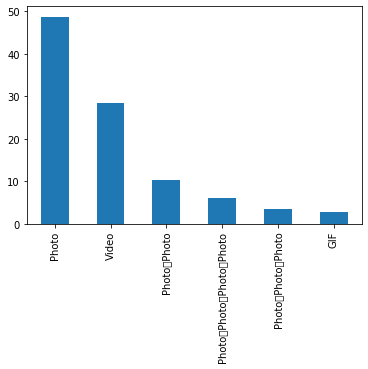

In [31]:
df_ploted = df_tweets.present_media.value_counts().iloc[1:7]*100/382000
df_ploted.plot(kind='bar')

In [84]:
l_tweets_most_used_domains = ['E33641C98602A0CACB497694F7AADC53',
    '8AC2C6B7D408D7A80D10FBEBBA7955A5',
    'E3F0EE6AC39DEDCF064B122C4135DCB2',
    '01AC5E85059CA6FAE2DA1EB30B6C1F99',
    '050CE0C1D4F7F61F81C6FD02E89D47CF',
    'BD1E36D897146CBDD1499403FC97425E',
    'B73A6A18CB0B5C8132D953F2781504CF',
    '23A9795EE43A05A1F3AB8B99EB579735',
    'E50C5E6E665E74D68D155B6AB19128CE',
    '3022981864C18E37681335917BD7AF65']

## Are there some common domains mostly used?

In [32]:
df_tweets.present_domains.value_counts()[0:10]

                                    854861
3896E26D12C903F0A00B6B1BE9A9BEA3     13636
E91CDEC8DC7ABF30592FA024616FF970      8501
FECA6F2E8244F2294BD2CE957C0602A9      6061
FCA72262B99BB78F010B25C882A0C93C      3602
A898ECD422D0575A276A0D74CD01C867      2222
A32007FFB62B2DFC4E449BD37F985C53      2136
9E34EBC679CA0BC677D198BEE3E37113      2075
BBA1D3359A23689C6783652EA73B12BA      1524
979ECC05068307E0490EA1B9B9B44411      1282
Name: present_domains, dtype: int64

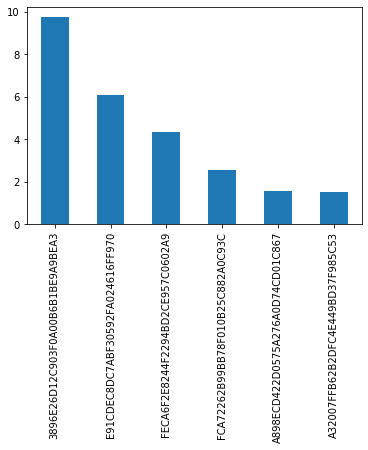

In [33]:
df_ploted = df_tweets.present_domains.value_counts().iloc[1:7]*100/140000
df_ploted.plot(kind='bar')

### What is the distribution of langage used in tweet?

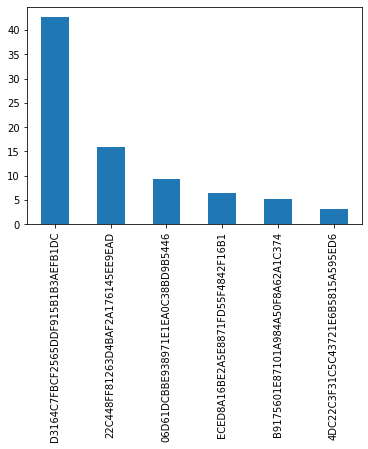

In [34]:
df_ploted = df_tweets.language.value_counts().iloc[0:6]*100/1000000
df_ploted.plot(kind='bar')

## What is the distribution of tweet type used in tweet?

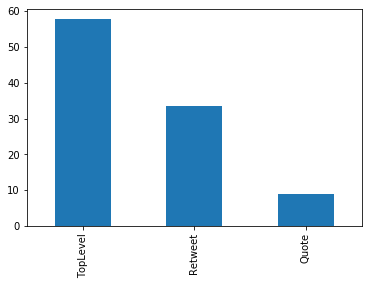

In [35]:
df_ploted = df_tweets.tweet_type.value_counts().iloc[0:6]*100/1000000
df_ploted.plot(kind='bar')

## If we focus on likes and we keep only tweets that was interacted with 3 times and users that interacted with at least 3 users 

### Add users_int column (number of interactions of the engagee user)

In [51]:
### Keep only users that has more than 3 tweets
dict_users_nb_int = dict(zip(list(df_tweets.engaging_user_id.value_counts().index), list(df_tweets.engaging_user_id.value_counts())))
###
list_nb_int_users = list()
mtx = df_tweets['engaging_user_id'].values
for i in range(len(df_tweets)):
    list_nb_int_users.append(dict_users_nb_int[mtx[i]])
df_tweets['users_int'] = list_nb_int_users
###
df_tweets_3_users = df_tweets[df_tweets['users_int']>=3]

### Add tweets_int column

In [52]:
### Keep only users that have more than 3 tweets
dict_users_nb_int = dict(zip(list(df_tweets.engaging_user_id.value_counts().index), list(df_tweets.engaging_user_id.value_counts())))
###
list_nb_int_users = list()
mtx = df_tweets['engaging_user_id'].values
for i in range(len(df_tweets)):
    list_nb_int_users.append(dict_users_nb_int[mtx[i]])
df_tweets['users_int'] = list_nb_int_users
###
df_tweets_3_users = df_tweets[df_tweets['users_int']>=3]
### Keep only tweets that have more than 3 interactions
dict_tweets_nb_int = dict(zip(list(df_tweets_3_users.tweet_id.value_counts().index), list(df_tweets_3_users.tweet_id.value_counts())))
###
list_nb_int_tweets = list()
mtx = df_tweets_3_users['tweet_id'].values
for i in range(len(df_tweets_3_users)):
    list_nb_int_tweets.append(dict_tweets_nb_int[mtx[i]])
df_tweets_3_users['tweets_int'] = list_nb_int_tweets
###
df_tweets_3_tweets = df_tweets_3_users[df_tweets_3_users['tweets_int']>=3]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [53]:
### Keep only users with  
df_temp = df_tweets_3_tweets.engaging_user_id.value_counts()<3
###
df_users_2_keep = df_temp[df_temp==0]
list_users2keep = list(df_users_2_keep.index)
##
df_tweets_3_keep_tweets = df_tweets_3_tweets[df_tweets_3_tweets.engaging_user_id.isin(list_users2keep)]

### Nb users in the final version

In [56]:
len(df_tweets_3_keep_tweets.engaging_user_id.value_counts())

62975

### Nb tweets in the final version

In [57]:
len(df_tweets_3_keep_tweets.tweet_id.value_counts())

85307

## Nb Interactions in the final version

In [58]:
len(df_tweets_3_keep_tweets)

220256

### Save the file

In [59]:
df_tweets_3_keep_tweets.to_csv('../Data/df_all_0.csv', index=False)